## Dataset Details

This dataset is formed from three different data sources used in the **ChatDoctor** project:

### Sources:
- **HealthCareMagic-100k**: 100,000 real conversations between patients and doctors from [HealthCareMagic.com](https://www.healthcaremagic.com/)
- **iCliniq-10k**: 10,000 real conversations between patients and doctors from [iCliniq.com](https://www.icliniq.com/)
- **GenMedGPT-5k**: 5,000 generated conversations between patients and physicians from ChatGPT and a disease database
  *(This dataset was not included due to being AI-generated. However, it can be manually added if desired.)*

### Dataset Link:
[Hugging Face Repository](https://huggingface.co/datasets/avaliev/chat_doctor?row=99)

---

## Sample Data:

```json
{
  "instruction": "If you are a doctor, please answer the medical questions based on the patient's description.",
  "input": "I woke up this morning feeling the whole room is spinning when I was sitting down. I went to the bathroom walking unsteadily, as I tried to focus I felt nauseous. I tried to vomit but it wouldn’t come out. After taking Panadol and sleeping for a few hours, I still feel the same. By the way, if I lay down or sit down, my head does not spin—only when I move around do I feel the whole world spinning. And is it normal to have stomach discomfort at the same time? Earlier, after I relieved myself, the spinning lessened, so I am not sure whether it's connected or just a coincidence. Thank you, doc!",
  "output": "Hi, Thank you for posting your query. The most likely cause of your symptoms is **Benign Paroxysmal Positional Vertigo (BPPV)**, a type of peripheral vertigo. The most common symptom is dizziness or giddiness, which worsens with movement. Accompanying nausea and vomiting are common. The condition is due to a problem in the ear and usually improves on its own within a few days. **Betahistine tablets** may help relieve your symptoms. Performing **vestibular rehabilitation** or adaptation exercises can prevent recurrence. An **ENT evaluation** is also recommended. I hope this helps. Best wishes, *Chat Doctor*."
}


In [1]:
!pip install -U langchain langchain-community faiss-cpu datasets sentence-transformers transformers accelerate torch torchvision torchaudio
!pip install bitsandbytes peft
!pip install gradio --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 66.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 55.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.9/275.9 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 96.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.6/336.6 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 2.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 25.9 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.

### Huggingface Login using HF Token

In [ ]:
import os
os.environ["HUGGINGFACE_TOKEN"] = "yourHFtoken"
!huggingface-cli login --token $HUGGINGFACE_TOKEN


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
The token `mytoken` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `mytoken`


In [2]:
import wandb

import os

#wandb.finish()

# Set your API key from wandb
os.environ["WANDB_API_KEY"] = "e487d3088678f5756edd7723c12b638fbb9b742f"

wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: ericrlessa (ericrlessa-george-brown-college). Use `wandb login --relogin` to force relogin


True

In [3]:
wandb.init(
    settings=wandb.Settings(init_timeout=120),
    project="final_t5_chatdoctor"
)

### 1. Exploratory Data Analysis (EDA)

 Loading dataset...


README.md:   0%|          | 0.00/2.34k [00:00<?, ?B/s]

train.json:   0%|          | 0.00/120M [00:00<?, ?B/s]

validation.json:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

test.json:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/95588 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11949 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11949 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


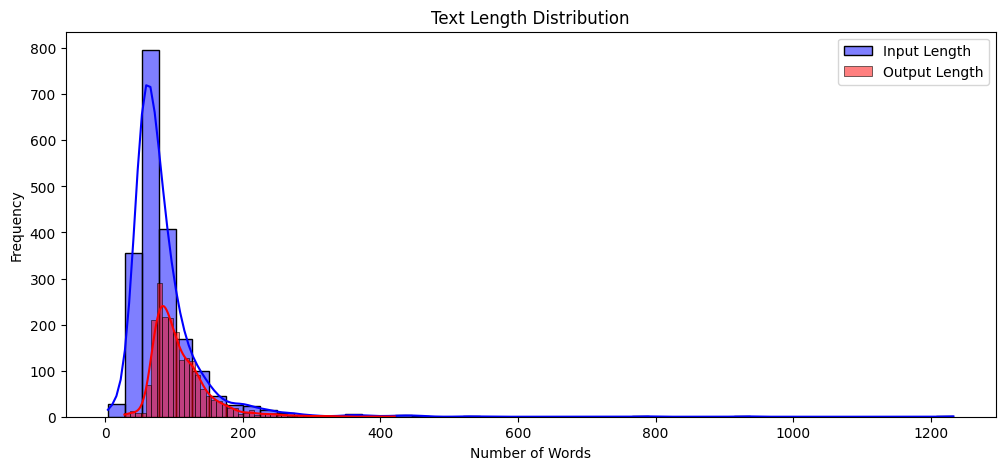

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


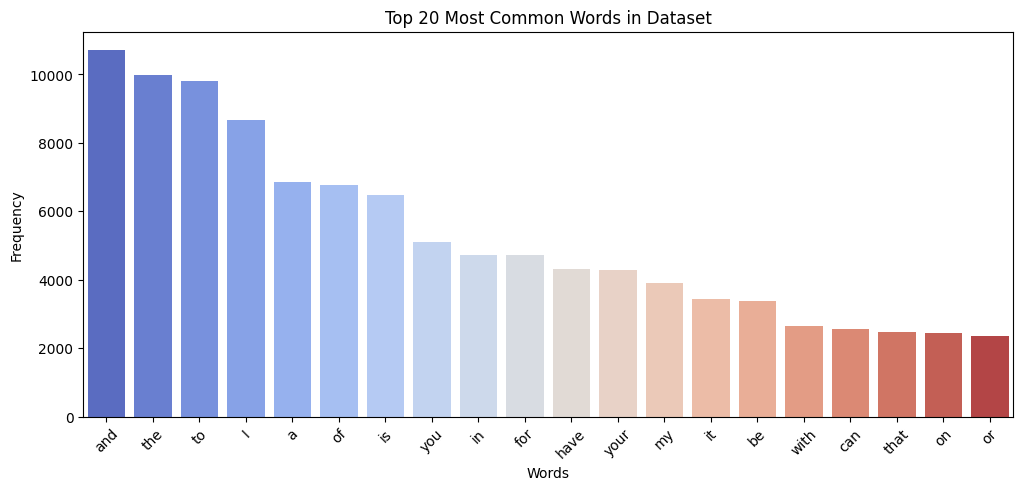

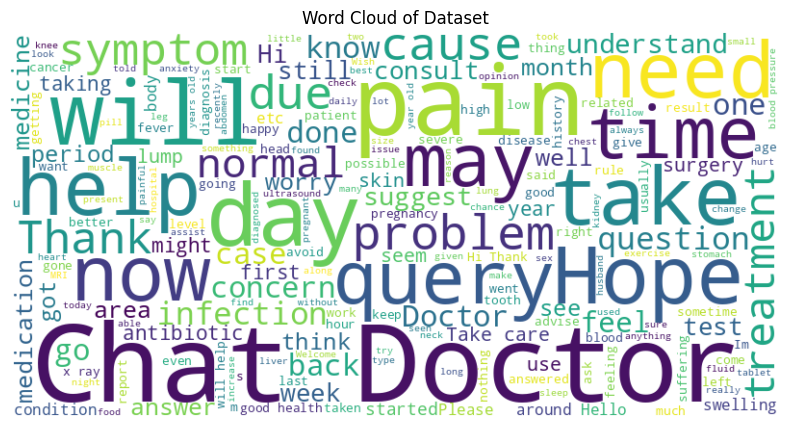


 Generating text embeddings for visualization...


<ipython-input-4-d0ee3f8fb956>:77: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embed_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

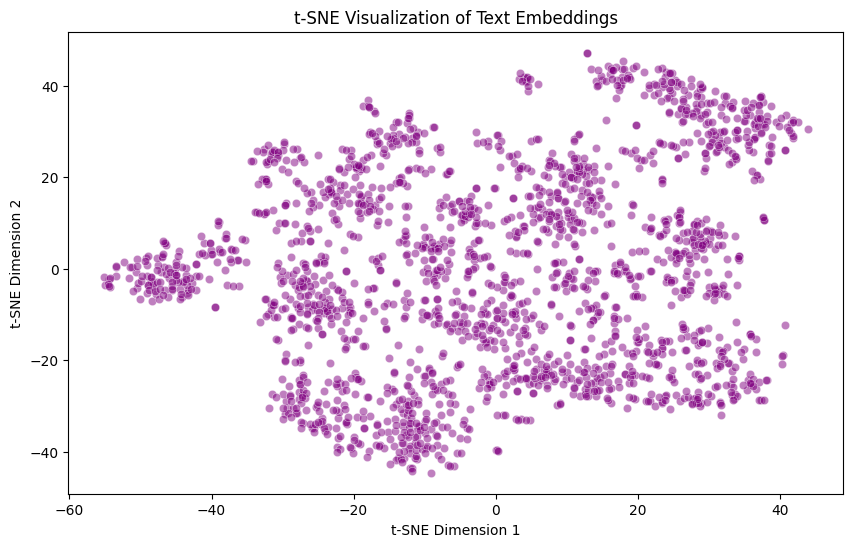


 EDA Completed!


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from datasets import load_dataset
import numpy as np
from sklearn.manifold import TSNE
from langchain_community.embeddings import HuggingFaceEmbeddings

def exploratory_data_analysis():

    """
    Performs exploratory data analysis (EDA) on the "Chat Doctor" dataset.

    This function loads the dataset, visualizes text length distributions,
    analyzes word frequencies, generates a word cloud, and performs t-SNE
    visualization of text embeddings.

    Steps:
    1. Loads and samples 2,000 rows for efficient visualization.
    2. Computes text length distributions and plots histograms.
    3. Analyzes word frequencies and visualizes the top 20 most common words.
    4. Generates a word cloud from the dataset.
    5. Generates sentence embeddings using a pre-trained MiniLM model.
    6. Applies t-SNE dimensionality reduction to visualize embeddings.

    Returns:
        None: Displays multiple plots and prints EDA completion message.
    """

    print(" Loading dataset...")
    dataset = load_dataset("avaliev/chat_doctor")
    df = pd.DataFrame(dataset["train"])

    # Sample Data (Only 2K rows for efficiency in visualization)
    df = df.sample(n=2000, random_state=42)
    df["combined_text"] = df["input"] + " " + df["output"]

    # Word count distributions
    df["input_length"] = df["input"].apply(lambda x: len(str(x).split()))
    df["output_length"] = df["output"].apply(lambda x: len(str(x).split()))

    plt.figure(figsize=(12, 5))
    sns.histplot(df["input_length"], bins=50, kde=True, color="blue", label="Input Length")
    sns.histplot(df["output_length"], bins=50, kde=True, color="red", label="Output Length")
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.title("Text Length Distribution")
    plt.legend()
    plt.show()

    # Word frequency analysis
    all_words = " ".join(df["combined_text"].astype(str))
    word_counts = Counter(all_words.split())
    common_words = word_counts.most_common(20)

    words, counts = zip(*common_words)
    plt.figure(figsize=(12, 5))
    sns.barplot(x=list(words), y=list(counts), palette="coolwarm")
    plt.xticks(rotation=45)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title("Top 20 Most Common Words in Dataset")
    plt.show()

    # Generate a Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of Dataset")
    plt.show()

    # Generate Embeddings for Visualization
    print("\n Generating text embeddings for visualization...")
    embed_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
    embeddings = embed_model.embed_documents(df["combined_text"].tolist())

    # Convert list of embeddings to NumPy array for t-SNE
    embeddings_array = np.array(embeddings)

    # Run t-SNE
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    tsne_results = tsne.fit_transform(embeddings_array)

    # Plot t-SNE results
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], alpha=0.5, color="purple")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.title("t-SNE Visualization of Text Embeddings")
    plt.show()

    print("\n EDA Completed!")

exploratory_data_analysis()


# Explanation of the t-SNE Plot

## What This t-SNE Plot Represents

- Each **point** represents a **medical QA pair** (question + answer).
- **Closer points** indicate **semantic similarity**, meaning the medical questions or answers are related.
- **Farther apart points** belong to **different topics or clusters**.

---

## Key Observations from the t-SNE Plot

### 1. Presence of Visible Clusters  
- **Certain medical topics naturally group together.**  
- Similar questions (e.g., related to **diabetes, hypertension, or respiratory diseases**) form clusters with similar embeddings.

### 2. Variation in Density  
- **Densely packed regions** → Frequently occurring medical topics in your dataset.  
- **Loosely packed or isolated points** → Rare or outlier topics that don’t fit well with others.

### 3. No Clear Separation of Distinct Groups  
- **t-SNE works well in high-dimensional spaces**, but its projections aren’t always perfectly separable.  
- This suggests a **mix of overlapping medical topics** rather than strictly distinct categories.



### 2. Fine-tuning pre-trained model (t5-small)

In [13]:
import torch
from datasets import load_dataset
import transformers
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, TrainingArguments, Trainer, DataCollatorForSeq2Seq

"""
    Fine-tunes the T5 model on the ChatDoctor dataset.

    Loads the dataset, preprocesses it, tokenizes input-output pairs,
    and fine-tunes the T5 model using the Trainer API.
    The fine-tuned model is saved to disk.

    Returns:
        tuple: (fine-tuned model, Trainer object, tokenizer)
"""
class ChatDoctorFineTuner:

    def __init__(self, model_name="t5-small"):
        self.model_name = model_name
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.tokenizer.pad_token = self.tokenizer.eos_token
        self.model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
        self.trainer = None
        self.tokenized_datasets = None
        self.dataset = None

    def prepare_data(self, dataset_name="avaliev/chat_doctor"):
        self.dataset = load_dataset(dataset_name)
        self.dataset["train"] = self.dataset["train"].select(range(500))
        self.tokenized_datasets = self.dataset.map(self.preprocess_function, batched=True, remove_columns=self.dataset["train"].column_names)


    def preprocess_function(self, examples):
      # Format the input with a task-specific prefix
      inputs = [f"As a doctor, respond to the following patient's medical question: {input_text}" for input_text in examples["input"]]
      targets = examples["output"]

      # Tokenize inputs and targets
      model_inputs = self.tokenizer(inputs, max_length=512, truncation=True, padding="max_length")
      labels = self.tokenizer(targets, max_length=512, truncation=True, padding="max_length")

      # Add labels to the model inputs
      model_inputs["labels"] = labels["input_ids"]
      return model_inputs

    def fine_tune(self):
      #  Training Arguments
      training_args = TrainingArguments(
          output_dir="./fine_tuned_chat_doctor",
          evaluation_strategy="epoch",
          per_device_train_batch_size=8,  #  Larger batch size since T5 is small
          per_device_eval_batch_size=8,
          num_train_epochs=1,  #  More epochs since training is faster
          save_strategy="epoch",
          logging_dir="./logs",
          logging_steps=10,
          report_to="all"
      )

      data_collator = DataCollatorForSeq2Seq(self.tokenizer, model=self.model)

      trainer = Trainer(
        model=self.model,
        args=training_args,
        train_dataset=self.tokenized_datasets["train"],
        eval_dataset=self.tokenized_datasets["validation"],
        tokenizer=self.tokenizer,
        data_collator=data_collator
      )

      # Train model
      print("\nStarting training...")
      try:
          trainer.train()
          print("\nTraining completed successfully!")
      except Exception as e:
          print(f"\nError during training: {str(e)}")
          return

      self.trainer = trainer

    def evaluate_model(self):
      # Evaluate Model
      metrics = self.trainer.evaluate(self.tokenized_datasets["test"])
      print(f" Evaluation Metrics: {metrics}")

    def save_model(self, path = "./fine_tuned_chat_doctor"):
      self.trainer.save_model(path)
      self.tokenizer.save_pretrained(path)
      return path

    def predict(self, input_text):
        """
        Generates a medical response using the fine-tuned T5 model.
    
        Args:
            model (AutoModelForSeq2SeqLM): The fine-tuned T5 model.
            tokenizer (AutoTokenizer): The tokenizer corresponding to the model.
            input_text (str): The medical question provided by the user.
    
        Returns:
            str: The generated response from the model.
        """
    
        # Structured input format
        formatted_input = f"Instruction: If you are a doctor, please answer the medical questions based on the patient's description.\n\nQuestion: {input_text}\n\nAnswer:"
    
        # Tokenize input
        inputs = self.tokenizer(formatted_input, return_tensors="pt", padding=True, truncation=True, max_length=512).to("cuda")
    
        # Generate response with better control
        output_ids = self.model.generate(
            **inputs,
            max_length=300,  #  Increased length to prevent truncation
            min_length=30,  #  Ensures full response
            num_beams=6,  # Increased for better diversity
            no_repeat_ngram_size=4,  #  Prevents repeating 4-word phrases
            repetition_penalty=2.3,  # Stricter repetition control
            early_stopping=True,  #  Stops at natural end
            temperature=0.7,  #  Slight randomness for better flow
            top_k=40,  #  Keeps diversity but prevents random noise
            top_p=0.85,  # Nucleus sampling for more controlled output
            length_penalty=0.9  # Avoids cutting off responses too soon
        )
    
        response = self.tokenizer.decode(output_ids[0], skip_special_tokens=True)
    
        return response


#### Instantiate the class and download dataset

### 3. Track Loss and Accuracy using Tensor Board

In [20]:
import os
from torch.utils.tensorboard import SummaryWriter

def track_training(fine_tuner):
    """
    Logs training and evaluation loss metrics to TensorBoard.

    This function extracts training and evaluation loss from the `trainer` object
    and logs them into TensorBoard for visualization.

    Steps:
    1. Creates a log directory (`./logs`) if it doesn't exist.
    2. Iterates through the `trainer.state.log_history` to extract loss metrics.
    3. Logs `train_loss` and `eval_loss` to TensorBoard.
    4. Closes the TensorBoard writer after logging.

    Args:
        trainer (transformers.Trainer): The Hugging Face `Trainer` instance that stores
            training and evaluation metrics.

    Returns:
        None: Logs the metrics to TensorBoard and prints a confirmation message.

    Example:
        ```python
        track_training(trainer)
        ```
    """

    log_dir = "./logs"
    os.makedirs(log_dir, exist_ok=True)

    writer = SummaryWriter(log_dir)

    for epoch, metrics in enumerate(fine_tuner.trainer.state.log_history):
        if "loss" in metrics:
            writer.add_scalar("Loss/train", metrics["loss"], epoch)
        if "eval_loss" in metrics:
            writer.add_scalar("Loss/eval", metrics["eval_loss"], epoch)

    writer.close()
    print("Training progress logged in TensorBoard!")



### Deploy the model as a RAG application

In [42]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, pipeline
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains import RetrievalQA
import pandas as pd
from datasets import load_dataset
import torch

class VectorStore:

    def __init__(self, fine_tuner):
        self.fine_tuner = fine_tuner
        self.embed_model = None
        self.retriever = None

    def store_dataset_embedded(self):
        df = pd.DataFrame(fine_tuner.dataset["train"])
    
        #  Combine input and output for FAISS
        df["combined_text"] = df["input"] + " " + df["output"]
    
        # Load FAISS Embeddings
        print(" Loading FAISS Embeddings...")
        self.embed_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
    
        #  Compute embeddings for FAISS
        print(" Computing embeddings for FAISS...")
        vectorstore = FAISS.from_texts(df["combined_text"].tolist(), self.embed_model)
    
        # Save & Load FAISS Index
        vectorstore.save_local("faiss_index")
        print(" FAISS index saved successfully!")
        
    def initiate_retriever(self):
        """
        Deploys the fine-tuned T5 model as a RAG-based chatbot using FAISS for document retrieval.
    
        This function:
        - Loads a fine-tuned T5 model and tokenizer.
        - Loads the `chat_doctor` dataset and preprocesses it.
        - Generates text embeddings using SentenceTransformers.
        - Stores embeddings in a FAISS vector store for retrieval.
        - Builds a retrieval-based chatbot that fetches relevant documents and generates answers.
    
        Returns:
            function: A `medical_qa_bot(question)` function that takes user input, retrieves context, and generates responses.
    
        Example:
            ```python
            chatbot = deploy_fine_tuned_model()
            response = chatbot("What are the symptoms of diabetes?")
            print(response)
            ```
        """
    
        print(" Loading FAISS Vector Store...")
        vectorstore = FAISS.load_local("faiss_index", self.embed_model, allow_dangerous_deserialization=True)
    
        self.retriever = vectorstore.as_retriever()
    
    # Define Custom Medical QA Function
    def predict(self, question):
        """
        Retrieves relevant documents from FAISS and generates an answer using the fine-tuned model.

        Args:
            question (str): The user's medical query.

        Returns:
            str: The AI-generated medical response.

        Example:
            ```python
            response = medical_qa_bot("What are the symptoms of diabetes?")
            print(response)
            ```
        """
        # Retrieve similar text from FAISS
        docs = self.retriever.get_relevant_documents(question)
        context = " ".join([doc.page_content for doc in docs])

        # Format input for the model
        formatted_question = f"{context}\n\nQuestion: {question}\n\nAnswer:"

        # Generate response using fine-tuned model
        response = fine_tuner.predict(formatted_question)

        return response

## Execution (Function calls)
---
### Phase 1:
- Fine-Tuning the Model.
- Saving and downloading the fine-tuned version.

In [25]:
# Phase 1: Fine-Tune Model
fine_tuner = ChatDoctorFineTuner()
fine_tuner.prepare_data()
fine_tuner.fine_tune()
fine_tuner.save_model()

Map:   0%|          | 0/11949 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-13-26ef5ca92623>:62: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



Starting training...


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,1.527500,1.352086


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(



Training completed successfully!


NameError: name 'fine_tune' is not defined

---
### Phase 2:
- Track Training using Tensor Board.
- Evaluate model on Test Dataset
- Plot Graph Training and Evaluation Loss Curve
- Make Prediction
-[Sample Questions for Prediction: "What are the symptoms of diabetes?", "How can I manage high blood pressure?", "What are the treatments for asthma?"]

In [27]:
# Track Training
track_training(fine_tuner)

Training progress logged in TensorBoard!


In [28]:
%load_ext tensorboard
%tensorboard --logdir /kaggle/working/logs --host 0.0.0.0 --port 6006

<IPython.core.display.Javascript object>

In [29]:
# Model Evaluation
fine_tuner.evaluate_model()

/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


 Evaluation Metrics: {'eval_loss': 1.354253888130188, 'eval_runtime': 298.7543, 'eval_samples_per_second': 39.996, 'eval_steps_per_second': 2.5, 'epoch': 1.0}


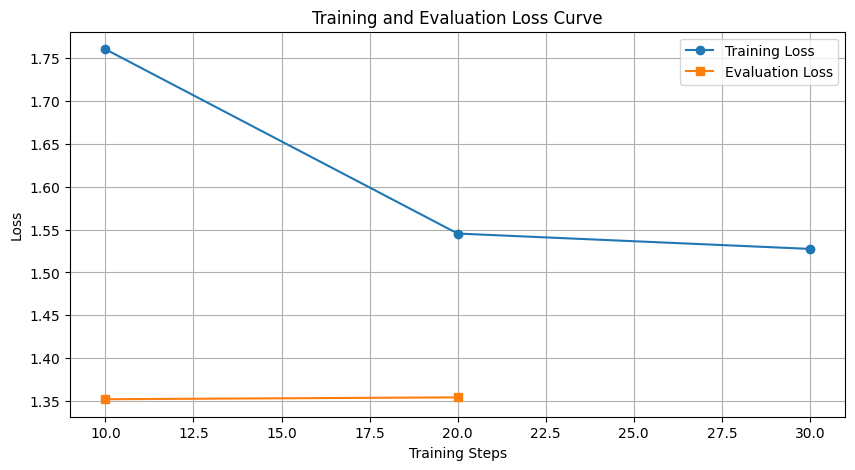

In [30]:
# Plotting Graph (Training Loss, Evaluation Loss)
import matplotlib.pyplot as plt

def plot_training_metrics(trainer):
    """
    Plots training loss and evaluation loss from Trainer's log history.
    """
    # Extract loss values from trainer logs
    log_history = trainer.state.log_history

    # Separate training loss and evaluation loss
    steps = []
    train_losses = []
    eval_losses = []

    for entry in log_history:
        if "loss" in entry:
            train_losses.append(entry["loss"])
            steps.append(entry["step"])
        if "eval_loss" in entry:
            eval_losses.append(entry["eval_loss"])

    # Plot Training and Evaluation Loss
    plt.figure(figsize=(10, 5))
    plt.plot(steps[:len(train_losses)], train_losses, label="Training Loss", marker="o")
    if eval_losses:
        plt.plot(steps[:len(eval_losses)], eval_losses, label="Evaluation Loss", marker="s")

    plt.xlabel("Training Steps")
    plt.ylabel("Loss")
    plt.title("Training and Evaluation Loss Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_metrics(fine_tuner.trainer)


In [31]:
# Make Predictions
fine_tuner.predict("What are the symptoms of diabetes?")

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.85` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:650: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `40` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(


"If you are a doctor, please answer the medical questions based on the patient's description. Question: What are the symptoms of diabetes?"

---
### Phase 3:
- Deploy the fine-tuned model as a RAG application.
- Gradio Interface as a front-end, for Client Interaction

In [37]:
# Deploy the Model

def create_vector_store():
    qa_bot = VectorStore(fine_tuner)
    qa_bot.store_dataset_embedded()
    qa_bot.initiate_retriever()
    return qa_bot


### Gradio interface

In [43]:
import gradio as gr

def gradio_interface():
    """
    Launches a Gradio-based interface for the Medical QA Bot.

    This function initializes and deploys a fine-tuned T5-based chatbot using Gradio.
    It allows users to input medical-related questions and receive AI-generated responses.

    The function performs the following steps:
    1. Deploys the fine-tuned model via `deploy_fine_tuned_model()`.
    2. Defines a chat function that takes user input and retrieves model responses.
    3. Creates an interactive Gradio UI with a text input and output box.
    4. Launches the Gradio interface with a public link.

    Returns:
        None: The function launches the Gradio interface and does not return a value.

    Example:
        To start the chatbot UI, simply call:

        >>> gradio_interface()

        This will display an interactive web UI where users can input medical queries.
    """

    # Deploy the fine-tuned model (loads the `qa_bot` function)
    qa_bot = create_vector_store()

    # Define Gradio function to interact with the bot
    def chat_function(user_input):
        """
        Generates a response from the fine-tuned model based on user input.

        Args:
            user_input (str): The medical question entered by the user.

        Returns:
            str: The chatbot-generated response.
        """
        response = qa_bot.predict(user_input)
        return response

    # Create Gradio UI
    interface = gr.Interface(
        fn=chat_function,  # Function to call
        inputs=gr.Textbox(lines=2, placeholder="Enter your medical question..."),
        outputs=gr.Textbox(),
        title=" Medical ChatBot (T5 Fine-Tuned)",
        description="Ask medical-related questions and get answers from the fine-tuned T5 model!",
        theme="default"
    )

    # Launch the UI
    interface.launch(share=True)  # Use `share=True` to get a public link
# start the Gradio UI
gradio_interface()


 Loading FAISS Embeddings...
 Computing embeddings for FAISS...
 FAISS index saved successfully!
 Loading FAISS Vector Store...
* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://c1090b36ce277c8107.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


<ipython-input-42-2f74f4dfec31>:79: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = self.retriever.get_relevant_documents(question)
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.85` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:650: UserWarning: `do_sample` is set to

### Individual Learning:

### Chaoyu Learning -
---

### Eric's Learning -
---

### Moossa's Learning
---

#### Understanding Resource & Time Constraints
- Large models like **Mistral-7B-OpenOrca** require significant resources.  
- Training **just 1,000 samples for 1 epoch with QLoRA optimization** took over **3 hours**.  
- Could not complete training due to high resource demands, leading to a switch to **T5-small** for efficiency.

#### Importance of Exploratory Data Analysis (EDA)
- EDA is crucial before model fine-tuning to understand the dataset.  
- Key insights like **context length** directly impact model learning.  
- If text length exceeds the model's limit, **important information may be lost**.  
- Different models have different **context window sizes**, so selection matters.

#### Impact of Hyperparameter Tuning
- Hyperparameter tuning plays a major role in:
  - Training time  
  - Model convergence  
  - Performance improvement  
- Small changes can significantly alter computation time and results.

#### Implementing a RAG-Based Solution with LangChain
- **LangChain** provides a structured approach to building RAG applications.  
- Explored:
  - **Vector Databases**
  - **Similarity Search**
  - **Retrieval Algorithms**  
- Understood how RAG helps **retrieve relevant context** before generating responses.

#### Interactive UI Development
- Implemented a **simple front-end** using **Gradio**, enabling an interactive chatbot experience.  
- **Gradio** makes it easy to deploy **LLM-based applications** without heavy frontend development.

#### Key Takeaways on Resource Optimization
- **Computational resources are the biggest constraint** in model training.  
- Techniques like **LoRA, QLoRA (4-bit optimization)** help reduce memory consumption while maintaining efficiency.  
- **Choosing the right model & training approach** depends on the specific **use case** and available compute.

#### Utilizing Free GPU Resources
- Used **Google Colab & Kaggle** for free GPU access.  
- **Preferred Kaggle** over Colab due to **session timeout issues** in Colab.  

#### Model Saving & Reusability
- **Saving the fine-tuned model** is crucial for:
  - Avoiding redundant training
  - Optimizing resource utilization
  - Deploying models efficiently without re-training

#### RAG & AI Hallucination
- **RAG helps LLMs generate more context-specific responses**, reducing hallucination.  
- However, **RAG alone cannot fully eliminate AI hallucination**—further refinements and filtering mechanisms are needed.


### Pranav's Learning -
---

### Sam's Learning -
---

### Shrey's Learning -
---

---
---
# Medical QA Bot: Fine-Tuning & RAG Implementation

## Project Summary
This project involves building a **Medical Question-Answering (QA) Bot** using **Retrieval-Augmented Generation (RAG)** and fine-tuning **T5-small** on the **ChatDoctor dataset**. The workflow includes **data exploration, model fine-tuning, evaluation, deployment, and interactive UI implementation** using Gradio.

### Key Steps & Implementation
1. **Exploratory Data Analysis (EDA)**
   - Analyzed dataset statistics, text length distributions, and most frequent words.
   - Applied **t-SNE visualization** on embeddings to understand document clustering.

2. **Fine-Tuning the Model**
   - Initially attempted fine-tuning **Mistral-7B-OpenOrca**, but due to **high resource demands**, switched to **T5-small**.
   - Applied **QLoRA (4-bit optimization)** but still encountered resource constraints.
   - Used **Google Colab & Kaggle GPUs**, preferring Kaggle due to **Colab session timeouts**.
   - Performed hyperparameter tuning to optimize training efficiency.

3. **Model Evaluation & Tracking**
   - Logged training loss and evaluation metrics using **TensorBoard**.
   - Applied **custom loss tracking** to monitor performance improvements.
   - Conducted inference tests to validate model responses.

4. **RAG-Based Retrieval System**
   - Implemented **FAISS** for storing and retrieving **document embeddings**.
   - Used **LangChain** to structure the **retrieval-augmented pipeline**.
   - Integrated **Hugging Face Embeddings (MiniLM)** for efficient similarity search.

5. **Interactive Deployment Using Gradio**
   - Built a **simple yet effective UI** for querying the medical chatbot.
   - Deployed the fine-tuned model with **Gradio-based web interface**.
   - Ensured that queries were processed in real-time using **LangChain RetrievalQA**.

---

## Results & Insights
- Fine-tuning a large model like Mistral-7B was infeasible due to resource constraints, necessitating a shift to **T5-small**.  
- Hyperparameter tuning significantly affects training time and performance, making **batch size, learning rate, and context length** crucial factors.  
- Retrieval-Augmented Generation (RAG) improves response relevance by incorporating contextual information from similar retrieved queries.  
- Gradio provides an effective and lightweight UI solution for real-time inference, making chatbot deployment seamless.  
- RAG helps reduce hallucination, but does not eliminate it completely, requiring further filtering and fine-tuning.

---

## Challenges Faced
- **High resource demand**: Training large models like Mistral-7B required **high-end GPUs**, making fine-tuning impractical.
- **Long training times**: Even with **QLoRA**, training remained **resource-intensive**.
- **Response repetition issues**: Initially, model outputs contained **repetitive sentences**, requiring **beam search tuning**.
- **Session timeouts**: **Colab frequently disconnected**, leading to preference for **Kaggle's persistent sessions**.

---

## Future Work
### Optimize Fine-Tuning Strategies
- Use **LoRA adapters** to fine-tune larger models with fewer resources.  
- Explore **parameter-efficient fine-tuning (PEFT)** methods.  
- Use **mixed-precision training (FP16/BF16)** for reduced memory consumption.  

### Enhance RAG System
- Implement **more advanced similarity search** techniques such as **hybrid retrieval (BM25 + dense embeddings)**.  
- Use **context filtering** to refine retrieved documents for more accurate generation.  
- Experiment with **chunk-based retrieval** to prevent exceeding model context length.  

### Improve Model Interpretability
- Integrate **SHAP or LIME** for explainability in AI-generated medical responses.  
- Track **confidence scores** to **flag uncertain predictions** for human review.  

### Expand UI & Deployment
- Convert **Gradio interface into a full-stack web app** with **Flask/FastAPI backend**.  
- Deploy the chatbot on **Hugging Face Spaces or AWS Lambda** for wider accessibility.  
- Implement **voice input** and **speech-to-text capabilities** for interactive Q&A.  

---

## Final Thoughts
This project demonstrated the feasibility of **fine-tuning T5-small for medical question answering** while leveraging **RAG-based retrieval for contextual enhancement**. While the chatbot performs well, **AI hallucination and response accuracy remain key challenges** that future work will focus on improving.

By optimizing training efficiency, enhancing retrieval mechanisms, and refining model deployment strategies, this project can be expanded into a **fully functional AI medical assistant** capable of handling **real-world use cases**.
